In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# minus 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)
# 한글 폰트를 사용하면 minus font가 깨지는 경우가 있어서 unicode_minus를 False로 설정

In [6]:
# 글씨를 선명하게 보기 위해 retina 설정을 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [47]:
plt.rc('font', family='Malgun Gothic')

In [14]:
df = pd.read_csv("C:/Users/enbi104/Documents/data/상가(상권)정보_201912/상가업소정보_201912_01.csv", error_bad_lines=False, sep='|', low_memory=False)
# 경로를 다 적어주지 않으면 에러가 뜸
# error_bad_lines=False, sep='|', 없으면 에러 뜸. 왜???
df.shape

(573680, 39)

In [8]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [46]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치 확인하기
##### 2020-07-08
- isnull().sum()

- plot()/plot.bar()/plot.harh()

- reset_index

- sort_values()

- NaN

- drop()

In [60]:
null_count = df.isnull().sum()
null_count.head()

상가업소번호       0
상호명          1
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
dtype: int64

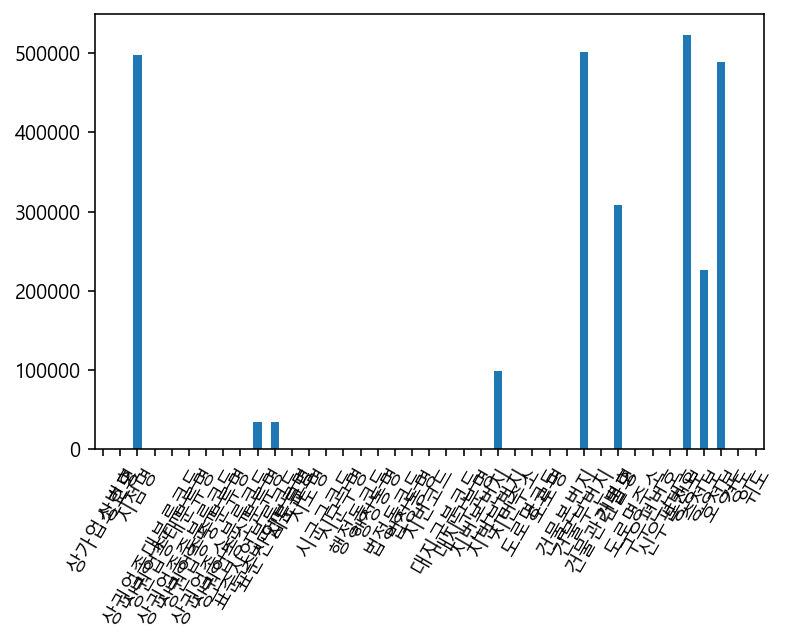

In [16]:
null_count.plot.bar
null_count.plot.bar(rot=60)

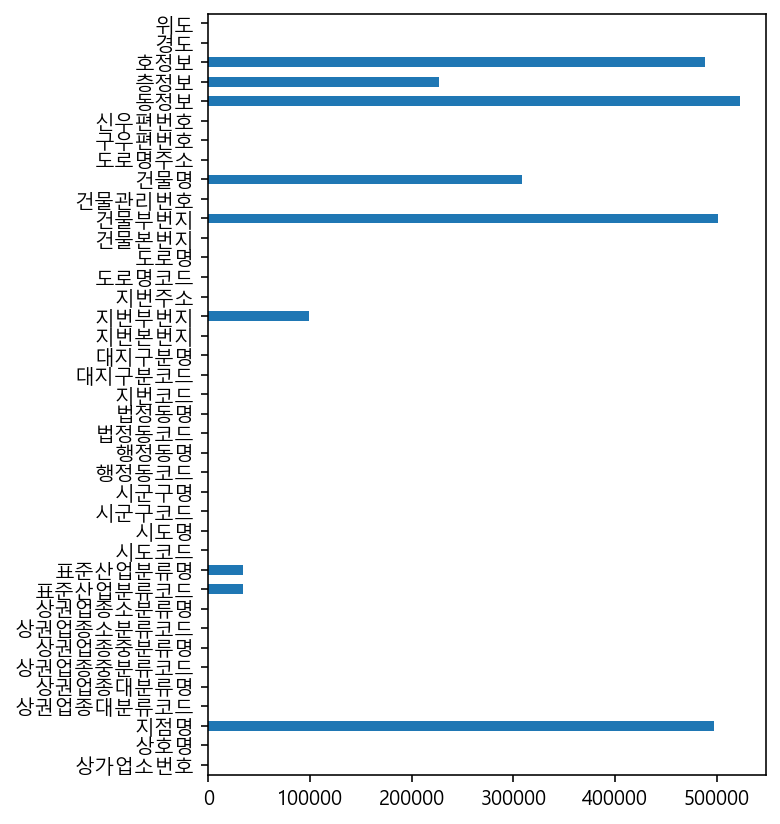

In [17]:
null_count.plot.barh(figsize=(5,7))

In [2]:
df_null_count = null_count.reset_index() #reset_index는 data frame 형태로 변화
df_null_count.head() # Error 발생'function' object has no attribute 'head'

NameError: name 'null_count' is not defined

In [58]:
df_null_count.columns = ["컬럼명", "결측치수"]

AttributeError: 'method' object has no attribute 'columns'

In [30]:
df_null_count.sort_values(by="결측치수", ascending = False)
# Error: 'function' object has no attribute 'sort_values'

AttributeError: 'function' object has no attribute 'sort_values'

In [15]:
df.drop(['건물명', '건물부번지', '지점명', '표준산업분류명', '호정보', '층정보', '동정보'], axis=1, inplace=True)
print(df)

          상가업소번호            상호명 상권업종대분류코드  상권업종대분류명 상권업종중분류코드      상권업종중분류명  \
0       19905471         와라와라호프         Q        음식       Q09          유흥주점   
1       19911397  커피빈코리아선릉로93길점         Q        음식       Q12        커피점/카페   
2       19911801           프로포즈         Q        음식       Q09          유흥주점   
3       19912201       싱싱커피&토스트         Q        음식       Q07         패스트푸드   
4       19932756       가락사우나내스낵         F     생활서비스       F09      대중목욕탕/휴게   
...          ...            ...       ...       ...       ...           ...   
573675  16394290        비파티세리공덕         Q        음식       Q01            한식   
573676  16336474          앤탑PC방         N  관광/여가/오락       N01  PC/오락/당구/볼링등   
573677  16336218       오즈아레나PC방         N  관광/여가/오락       N01  PC/오락/당구/볼링등   
573678  16335152         파인트리네일         F     생활서비스       F01       이/미용/건강   
573679  16335150         마이리틀네일         F     생활서비스       F01       이/미용/건강   

       상권업종소분류코드     상권업종소분류명 표준산업분류코드  시도코드  ...  

In [17]:
df.shape

(573680, 32)

## 기술통계 값 보기
#### 2020.07.09

In [19]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '시도코드', '시도명', '시군구코드', '시군구명',
       '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지',
       '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호',
       '신우편번호', '경도', '위도'],
      dtype='object')

In [20]:
df["위도"].dtypes #데이터타입을 알기 위해서

dtype('float64')

In [22]:
df["위도"].mean()

36.85469787421801

In [23]:
df["위도"].median()

37.5112070048312

In [26]:
df["위도"].max()

37.69239838166121

In [27]:
df["위도"].min()

35.0067597383124

In [28]:
df["위도"].count()

573680

In [29]:
df["위도"].describe()

count    573680.000000
mean         36.854698
std           1.081285
min          35.006760
25%          35.215422
50%          37.511207
75%          37.560362
max          37.692398
Name: 위도, dtype: float64

In [30]:
# 둘 이상의 자료
df[["위도", "경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [32]:
df.describe(include="number") # 숫자로 된 데이터만 요약

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,5.736800e+05,573680.000000,573680.000000,5.736800e+05,5.736800e+05,5.736800e+05,573680.000000,573680.000000,474924.000000,5.736800e+05,573680.000000,573680.000000,573671.000000,573680.000000,573680.000000
mean,2.044501e+07,15.348348,15763.525241,1.576413e+09,1.576364e+09,1.576365e+18,1.001337,469.281810,33.526514,1.576388e+11,153.912094,273865.589341,17531.336024,127.596287,36.854698
std,5.205697e+06,6.805672,6764.853061,6.764838e+08,6.764853e+08,6.764852e+17,0.036540,484.778049,109.050559,6.764847e+10,276.980935,215630.650361,19418.733839,0.941262,1.081285
min,2.890524e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.000000,126.768169,35.006760
25%,1.607177e+07,11.000000,11320.000000,1.132068e+09,1.132011e+09,1.132011e+18,1.000000,109.000000,3.000000,1.132041e+11,20.000000,134856.000000,4385.000000,126.968316,35.215422
50%,2.212026e+07,11.000000,11620.000000,1.162058e+09,1.162010e+09,1.162010e+18,1.000000,335.000000,9.000000,1.162030e+11,50.000000,142876.000000,6517.000000,127.047672,37.511207
75%,2.479404e+07,26.000000,26230.000000,2.623051e+09,2.623010e+09,2.623010e+18,1.000000,678.000000,25.000000,2.623020e+11,172.000000,604042.000000,46567.000000,128.986938,37.560362
max,2.852486e+07,26.000000,26710.000000,2.671033e+09,2.671033e+09,2.671033e+18,2.000000,9999.000000,9992.000000,2.671042e+11,3318.000000,619963.000000,49527.000000,129.292243,37.692398


In [33]:
df.describe(include="object") # 문자열 데이터만 요약

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,539290,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,9,94,94,709,709,211,2,39,629,648,2,190237,18001,191667,190486
top,점프셈교실,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,2623010300105030015004104,부산광역시 부산진구 가야대로 772
freq,2297,185516,185516,59725,59725,38133,38133,75372,407376,47080,10400,12102,572913,1058,3543,1058,1058


## 문자열 데이터 요약하기

- unique() / nunique()
- value_counts()
- barh()/pie chart()

### 상권업종대분류명에서 '의료'만 추출하기

In [34]:
# unique는 값의 종류가 몇 개인지를 보여줌
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [39]:
df = df[(df["상권업종대분류명"] == "의료")]

In [41]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [42]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '유사의료업', '수의업', '의료관련서비스업'], dtype=object)

In [43]:
df["상권업종소분류명"].unique()

array(['내과/외과', '기타병원', '소아과', '정형/성형외과', '한의원', '치과의원', '일반병원', '약국',
       '노인/치매병원', '언어치료', '종합병원', '침구원', '한방병원', '이비인후과의원', '한약방', '동물병원',
       '유사의료업기타', '척추교정치료', '산부인과', '피부과', '탕제원', '산후조리원', '응급구조대',
       '치과병원', '혈액원', '비뇨기과', '신경외과', '안과의원', '치과기공소', '접골원', '수의업-종합',
       '조산원', '수의업-기타'], dtype=object)

In [44]:
df["시도명"].value_counts()

서울특별시    19011
부산광역시     6498
Name: 시도명, dtype: int64

In [45]:
df["시도명"].value_counts(normalize=True)

서울특별시    0.745266
부산광역시    0.254734
Name: 시도명, dtype: float64

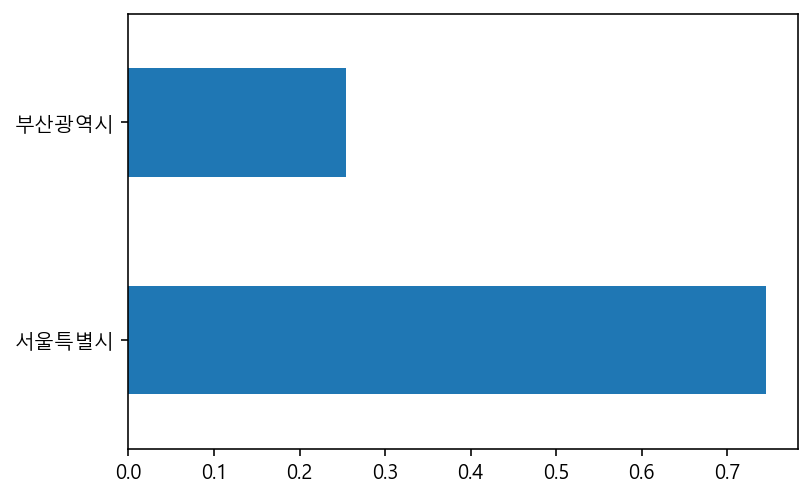

In [48]:
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize.plot.barh()

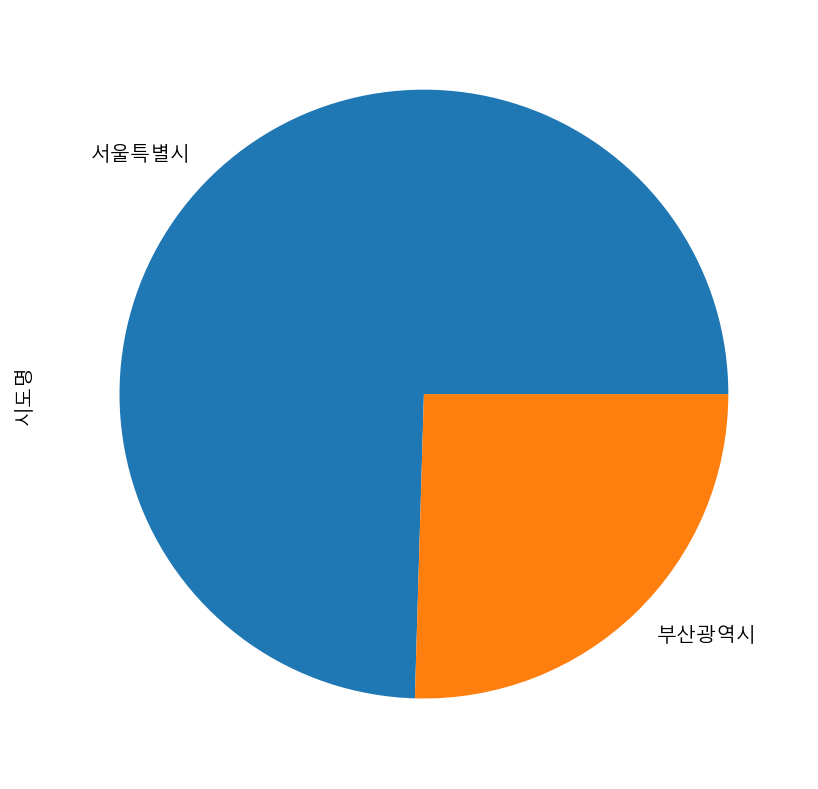

In [49]:
city_normalize.plot.pie(figsize=(7, 7))

## 데이터 요약하기 - seaborn 으로 빈도수 시각화 하기
- countplot
- seaborn
- value_counts
- df.plot.bar
- df.plot.barh

In [52]:
c = df["상권업종중분류명"].value_counts()
c

병원          18089
약국/한약방       5143
수의업          1195
유사의료업         931
의료관련서비스업      151
Name: 상권업종중분류명, dtype: int64

In [53]:
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.709122
약국/한약방      0.201615
수의업         0.046846
유사의료업       0.036497
의료관련서비스업    0.005919
Name: 상권업종중분류명, dtype: float64

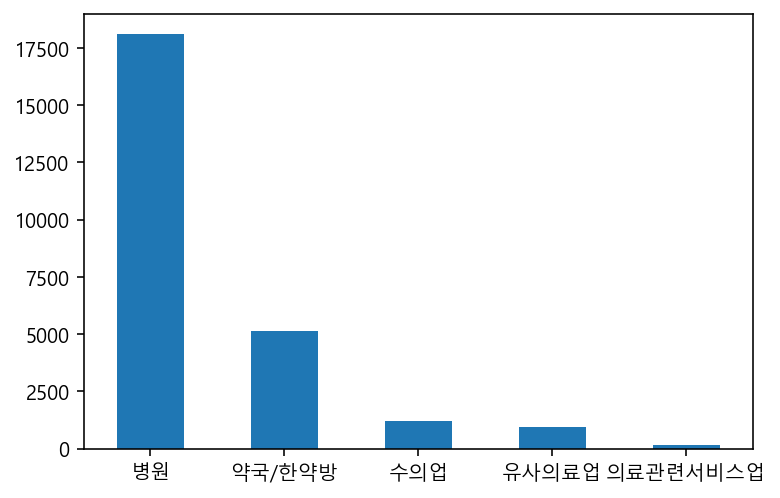

In [59]:
c.plot.bar(rot=0)

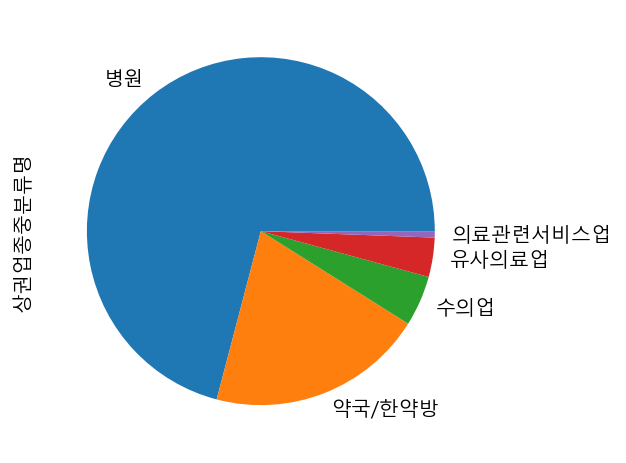

In [60]:
n.plot.pie()

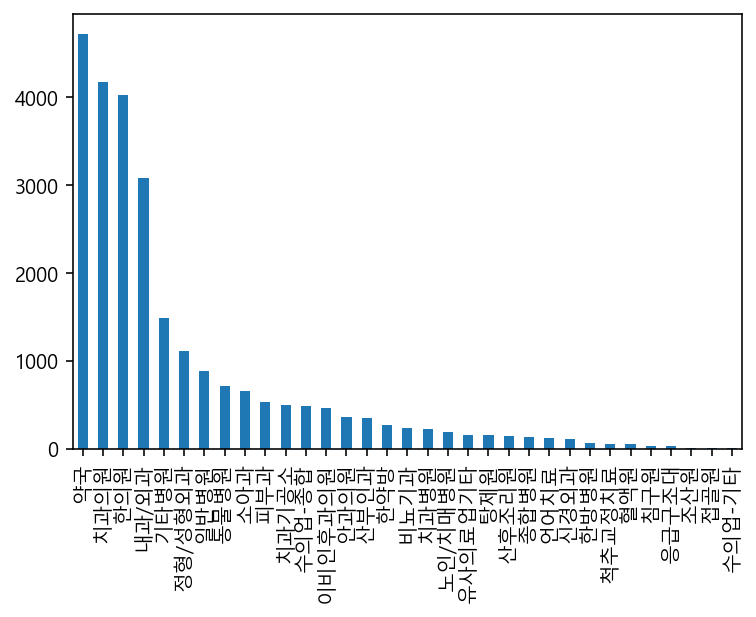

In [61]:
c = df["상권업종소분류명"].value_counts()
c.plot.bar()

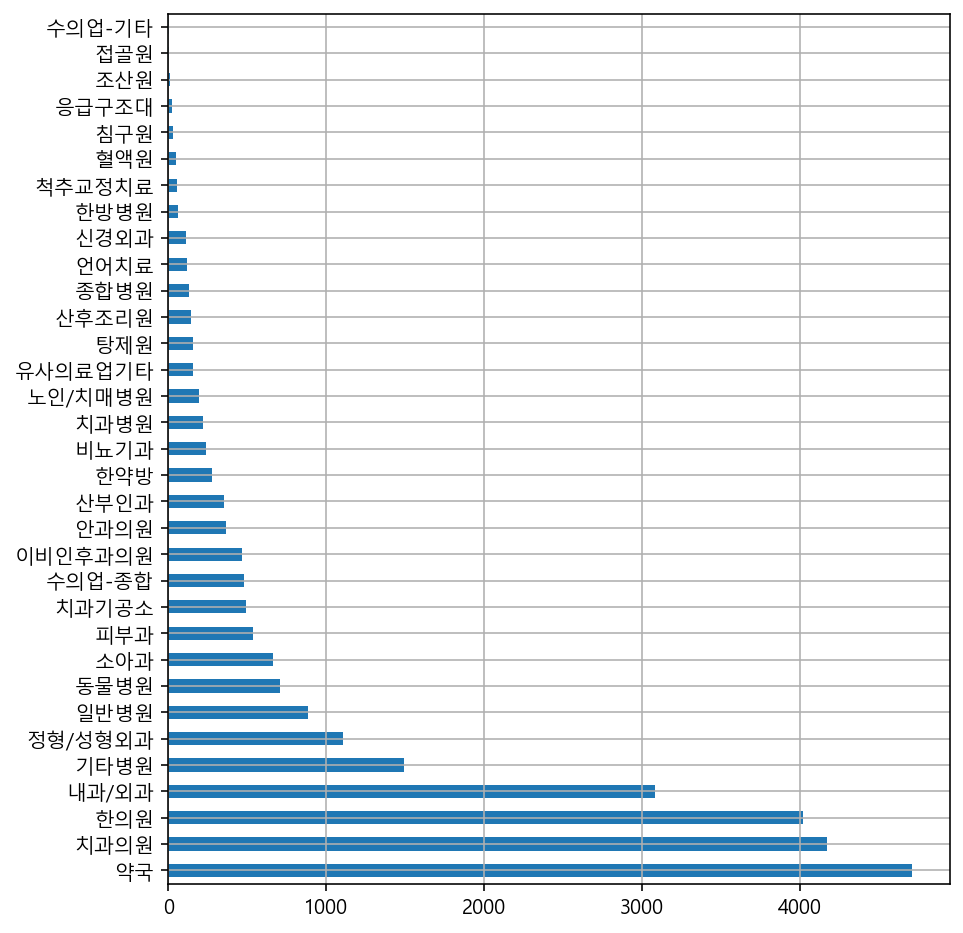

In [63]:
c.plot.barh(figsize=(7,8), grid=True)